In [25]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None, names=['text'])
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                text
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


In [26]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/yoana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [27]:
from gensim.parsing.preprocessing import remove_stopwords
import string 

#Data Preprocessing
reviews['text'] = reviews['text'].apply(lambda x: remove_stopwords(x))
reviews['text'] = reviews['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

y = np.array((labels=='positive').astype(np.int_)).ravel()


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000, stop_words= stopwords.words('english'))

X = vectorizer.fit_transform(reviews['text']).toarray()
print(X.shape)
print(vectorizer.vocabulary_)

(25000, 10000)
{'high': 4195, 'cartoon': 1312, 'comedy': 1718, 'ran': 7100, 'time': 9084, 'programs': 6910, 'school': 7777, 'life': 5183, 'teachers': 8916, 'years': 9959, 'teaching': 8918, 'profession': 6898, 'lead': 5102, 'believe': 787, 'satire': 7731, 'closer': 1630, 'reality': 7176, 'survive': 8797, 'financially': 3406, 'insightful': 4588, 'students': 8641, 'right': 7502, 'pathetic': 6444, 'situation': 8162, 'remind': 7328, 'schools': 7778, 'knew': 4975, 'saw': 7746, 'episode': 3017, 'student': 8640, 'repeatedly': 7355, 'tried': 9259, 'burn': 1158, 'immediately': 4446, 'classic': 1579, 'line': 5224, 'inspector': 4596, 'sack': 7666, 'welcome': 9765, 'expect': 3147, 'adults': 142, 'age': 177, 'think': 9021, 'far': 3280, 'fetched': 3358, 'pity': 6611, 'story': 8583, 'man': 5446, 'unnatural': 9429, 'feelings': 3337, 'pig': 6592, 'starts': 8495, 'opening': 6225, 'scene': 7768, 'terrific': 8973, 'example': 3103, 'absurd': 25, 'orchestra': 6252, 'audience': 569, 'turned': 9304, 'insane': 

In [29]:
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(X, y, train_size=.8, random_state=504)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=.75, random_state=504)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_validate.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:15000
Size of validation set:5000
Size of test set:5000


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [30]:
##Representation of a word against the dataset
print( "Number of occurences: {}".format(vectorizer.vocabulary_["high"]))

##Representation of a review
reviewA = vectorizer.transform([reviews['text'].iloc[0]]).toarray()
print("0 represents a word that is not part of the first 10000 most freqvent words; 1 the opossite ")
print(reviewA)

Number of occurences: 4195
0 represents a word that is not part of the first 10000 most freqvent words; 1 the opossite 
[[0 0 0 ... 0 0 0]]


**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [31]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(units=100, input_dim=X.shape[1], activation='relu'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy']) 


In [32]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_validate, y_validate), callbacks=[es])

print("Accuracy on training data: {}".format(model.evaluate(X_train, y_train)))

Epoch 1/100
469/469 [==============================] - 7s 11ms/step - loss: 0.3729 - accuracy: 0.8454 - val_loss: 0.3125 - val_accuracy: 0.8770
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1598 - accuracy: 0.9382 - val_loss: 0.3844 - val_accuracy: 0.8588
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0650 - accuracy: 0.9765 - val_loss: 0.6092 - val_accuracy: 0.8578
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.9526 - val_accuracy: 0.8580
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0272 - accuracy: 0.9924 - val_loss: 1.0733 - val_accuracy: 0.8638
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 1.2398 - val_accuracy: 0.8664
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 1.2217 - val_accuracy: 0.853

**(d)** Test your sentiment-classifier on the test set.

In [33]:
print("Accuracy on testing data: {}".format(model.evaluate(X_test, y_test)))

157/157 [==============================] - 1s 5ms/step - loss: 0.3179 - accuracy: 0.8800
Accuracy on testing data: [0.3178892433643341, 0.8799999952316284]


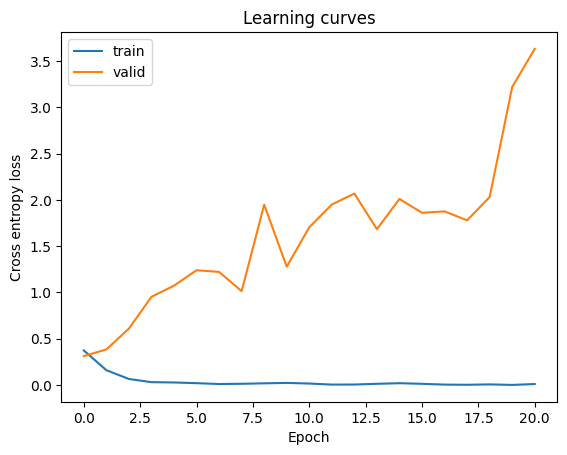

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()


**(e)** Use the classifier to classify a few sentences you write yourselves. 